In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Exploration Data

In [46]:
df = pd.read_csv("/home/walaa-shaaban/Desktop/project_git/E-Commerce-Neural-Nework/data.csv", encoding= 'unicode_escape')

In [47]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [48]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [49]:
df.shape

(541909, 8)

In [50]:
df.drop(['Description', 'CustomerID'], axis=1, inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Quantity     541909 non-null  int64  
 3   InvoiceDate  541909 non-null  object 
 4   UnitPrice    541909 non-null  float64
 5   Country      541909 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 24.8+ MB


In [52]:
df.describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [53]:
df['year'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0].split("/")[2])
df['month'] = df['InvoiceDate'].apply(lambda x : x.split(" ")[0].split("/")[0])

In [54]:
countries = df['Country'].value_counts().sort_index()[:10].index.values.tolist()
mean_unit_price = [np.round(df[df['Country']==c]['UnitPrice'].sum(), 4)for c in countries ]
df_country = pd.DataFrame({'country' : countries,  'UnitPrice':mean_unit_price})

In [55]:
df_country

,country,UnitPrice
0,Australia,4054.75
1,Austria,1701.52
2,Bahrain,86.57
3,Belgium,7540.13
4,Brazil,142.60
5,Canada,910.58
6,Channel Islands,3738.55
7,Cyprus,3920.07
8,Czech Republic,88.15
9,Denmark,1266.95


# Data visualization

In [57]:
color = sns.color_palette()[4]

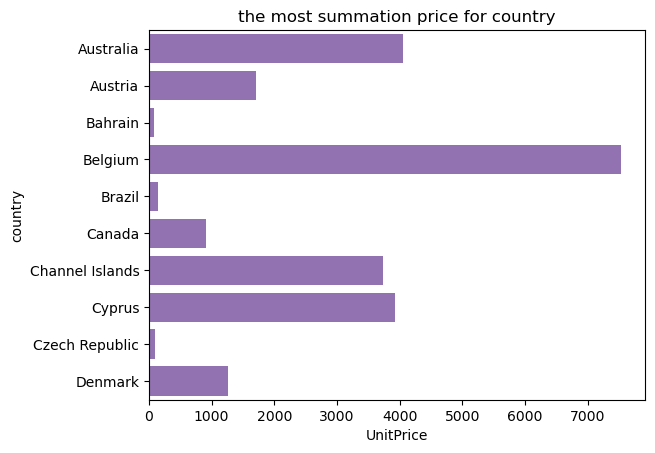

In [58]:
plt.title("the most summation price for country")
sns.barplot(data=df_country, y='country', x="UnitPrice", color=color);

In [59]:
months = df['month'].value_counts().index.values.tolist()
mean_unit_price = [np.round(df[df["month"]==month]['UnitPrice'].sum(), 4) for month in months ]
df_month = pd.DataFrame({'month' : months,  'UnitPrice':mean_unit_price})

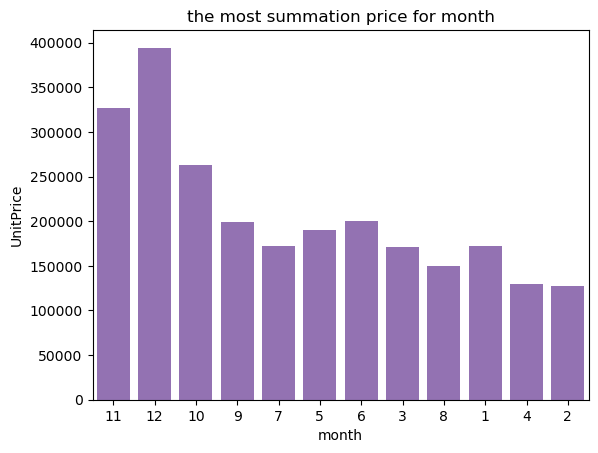

In [60]:
plt.title("the most summation price for month")
sns.barplot(data=df_month, x='month', y="UnitPrice", color=color);